In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_cityrides_data_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Display the data table for preview
combined_cityrides_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#City types
urban_type = combined_cityrides_data_df[combined_cityrides_data_df["type"]=="Urban"]
urban_avg_fare = urban_type.groupby("city").mean()["fare"]
urban_total_rides = urban_type.groupby("city").count()["ride_id"]
urban_total_drivers = urban_type.groupby("city").mean()["driver_count"]

suburban_type = combined_cityrides_data_df[combined_cityrides_data_df["type"]=="Suburban"]
suburban_avg_fare = suburban_type.groupby("city").mean()["fare"]
suburban_total_rides = suburban_type.groupby("city").count()["ride_id"]
suburban_total_drivers = suburban_type.groupby("city").mean()["driver_count"]

rural_type = combined_cityrides_data_df[combined_cityrides_data_df["type"]=="Rural"]
rural_avg_fare = rural_type.groupby("city").mean()["fare"]
rural_total_rides = rural_type.groupby("city").count()["ride_id"]
rural_total_drivers = rural_type.groupby("city").mean()["driver_count"]

## Bubble Plot of Ride Sharing Data

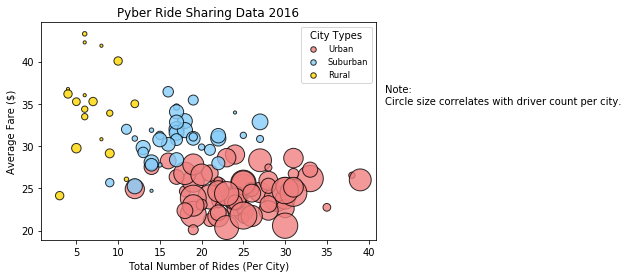

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

plt.scatter(urban_total_rides, urban_avg_fare, marker="o", facecolors="red", edgecolor="black", linewidths=1, s=10*urban_total_drivers, c="lightcoral", alpha=0.8, label="Urban")
plt.scatter(suburban_total_rides, suburban_avg_fare, marker="o", facecolors="red", edgecolor="black", linewidths=1, s=10*suburban_total_drivers, c="lightskyblue", alpha=0.8, label="Suburban")
plt.scatter(rural_total_rides, rural_avg_fare, marker="o", facecolors="red", edgecolor="black", linewidths=1, s=10*rural_total_drivers, c="gold", alpha=0.8, label="Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
#plt.legend(handles=["City Types"], loc="best")

lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/pyber_bubblechart.png")

# Show plot
plt.show()

## Total Fares by City Type

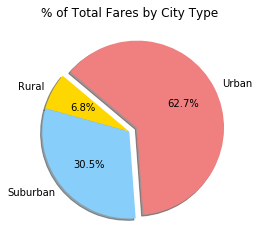

In [4]:
# Calculate Type Percents
total_fares = combined_cityrides_data_df["fare"].sum()
total_fares_city_type = combined_cityrides_data_df.groupby("type").sum()["fare"]
per_total_fares_city_type = (total_fares_city_type /  total_fares) * 100
# per_total_fares_city_type
                                      
# Build Pie Chart
plt.title("% of Total Fares by City Type")

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.1]

plt.pie(total_fares_city_type, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/pyberpiechart_totalfaresbycitytype.png")
plt.show()

## Total Rides by City Type

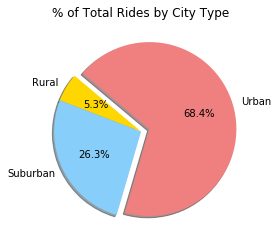

In [5]:
# Calculate Ride Percents
total_rides = ride_data_df["ride_id"].count()
total_rides_city_type = combined_cityrides_data_df.groupby("type").count()["ride_id"]
per_total_rides_city_type = (total_rides_city_type /  total_rides) * 100
# per_total_rides_city_type

# Build Pie Chart
plt.title("% of Total Rides by City Type")

plt.pie(total_rides_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/pyberpiechart_totalridesbycitytype.png")

# Show Figure
plt.show()

## Total Drivers by City Type

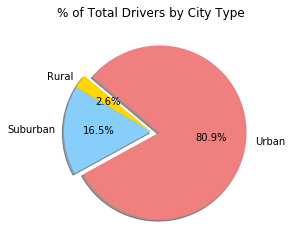

In [6]:
# Calculate Driver Percents
total_drivers = city_data_df["driver_count"].sum()
total_drivers_city_type = city_data_df.groupby("type")["driver_count"].sum()
per_total_drivers_city_type = (total_drivers_city_type /  total_drivers) * 100
# per_total_drivers_city_type

# Build Pie Charts
plt.title("% of Total Drivers by City Type")

plt.pie(total_drivers_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/pyberpiechart_totaldriversbycitytype.png")

# Show Figure
plt.show()